In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [23]:
#Library to load Dataset
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
#Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
#Library for measuring accuracy
from sklearn.metrics import accuracy_score 

In [4]:
#Loading the Dataset2
data_1 = loadmat('/content/dataset_2.mat')
#Printing the values of dataset1 
print(data_1.keys())
print(data_1['samples'])
print(data_1['labels'])

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])
[[-3.74203958 -3.04465737]
 [ 4.60871196  7.01765941]
 [ 5.31135551  0.97011991]
 ...
 [ 5.17666258  5.10746383]
 [ 6.66563706  5.465137  ]
 [ 7.86690019  4.4964122 ]]
[[0 3 2 ... 3 3 3]]


In [5]:
#Printing the shape and type of the samples and labels from Dataset1
x_1 = data_1['samples']
y_1 = data_1['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (20000, 2)
Shape of Label (1, 20000)


In [6]:
#Convert to DataFrame
sample_x = x_1[:,0]
sample_y = x_1[:,1]
label = y_1[0]
data_frame = pd.DataFrame(list(zip(sample_x,sample_y,label)), columns=["Sample_X","Sample_Y","Label"])
#Shuffle the Dataset
data_frame = data_frame.sample(frac = 1) 
print(data_frame)

       Sample_X  Sample_Y  Label
7115   5.064225  2.433704      2
6040   6.735285  1.296098      2
2398   4.776000  6.372168      3
3740   5.322675  3.068554      2
11958 -0.715115 -2.311694      0
...         ...       ...    ...
10497  6.470860  0.671294      2
4483   4.523209  2.387685      2
16922  5.816270  5.082102      3
13725  5.367076  2.384741      2
14120  4.463529  1.492944      2

[20000 rows x 3 columns]


In [7]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_frame['Label']
print(data_y)
data_x = data_frame.drop(["Label"],axis=1)
print(data_x)

7115     2
6040     2
2398     3
3740     2
11958    0
        ..
10497    2
4483     2
16922    3
13725    2
14120    2
Name: Label, Length: 20000, dtype: int64
       Sample_X  Sample_Y
7115   5.064225  2.433704
6040   6.735285  1.296098
2398   4.776000  6.372168
3740   5.322675  3.068554
11958 -0.715115 -2.311694
...         ...       ...
10497  6.470860  0.671294
4483   4.523209  2.387685
16922  5.816270  5.082102
13725  5.367076  2.384741
14120  4.463529  1.492944

[20000 rows x 2 columns]


In [8]:
#Function to implement the split the data into train and test data
def split_train_test(data_x,data_y,percentage,total):
  split_size = int((total*percentage)/100)
  x_train = data_x[0:split_size]
  x_test = data_x[split_size:total]
  y_train = data_y[0:split_size]
  y_test = data_y[split_size:total]
  return x_train,x_test,y_train,y_test

In [17]:
#Dividing the Dataset into 70:30
x_train,x_test,y_train,y_test = split_train_test(data_x,data_y,70,20000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train)

(14000, 2)
(6000, 2)
(14000,)
(6000,)
       Sample_X  Sample_Y
7115   5.064225  2.433704
6040   6.735285  1.296098
2398   4.776000  6.372168
3740   5.322675  3.068554
11958 -0.715115 -2.311694
...         ...       ...
9831   5.384921  5.916445
6859  -2.778155  4.457587
1807  -4.375374  4.459128
3666  -3.679593 -3.564318
15642 -3.995609 -4.158217

[14000 rows x 2 columns]


In [10]:
#Function to find accuracy
def find_accuracy(y_predict,y_test,n):
  true_positive = 0
  false_negative = 0
  for i in range(0,n):
    #Finding the true matched values
    true_positive = true_positive + int(y_predict[i] == y_test[i])
    #Finding the unmatched values
    false_negative = false_negative + int(y_predict[i] != y_test[i])
    #Finding total values
    total = true_positive + false_negative
    #Find the accuracy
    accuracy = true_positive/total
    accuracy = accuracy*100
  return accuracy

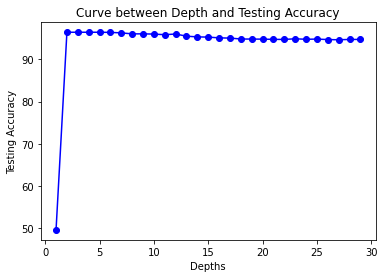

In [33]:
def Q2_a(x_train,x_test,y_train,y_test):
  #List to store the test accuracy
  test_accuracy = []
  #List to store the depth
  depths = []
  for depth in range(1,30):
    #Using the Decision Tree Classifier
    trained_model = DecisionTreeClassifier(max_depth = depth)
    trained_model.fit(x_train,y_train)
    trained_predict = trained_model.predict(x_test)
    #Appending the test accuracy of every depth
    test_accuracy.append(find_accuracy(trained_predict,y_test.tolist(),y_test.size))
    depths.append(depth)
  #Labelling the Plot
  #Plotting the curve between the Depth and Testing Accuracy
  fig2 = plt.plot(depths,test_accuracy,marker='o',color='b')
  plt.xlabel('Depths')
  plt.ylabel('Testing Accuracy')
  plt.title("Curve between Depth and Testing Accuracy")
  plt.show()

Q2_a(x_train,x_test,y_train,y_test)

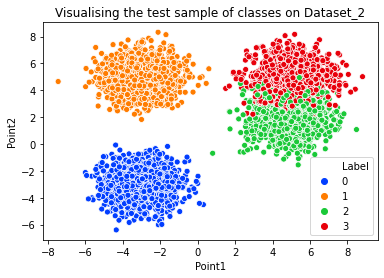

In [34]:
def Q2_a1(x_train,x_test,y_train,y_test):
  #List to store the test accuracy
  test_accuracy = []
  #List to store the depth
  depths = []
  for depth in range(1,30):
    #Using the Decision Tree Classifier
    trained_model = DecisionTreeClassifier(max_depth = depth)
    trained_model.fit(x_train,y_train)
    trained_predict = trained_model.predict(x_test)
    #Appending the test accuracy of every depth
    test_accuracy.append(find_accuracy(trained_predict,y_test.tolist(),y_test.size))
    depths.append(depth)
  #Plotting the scatterplot with test_data and predicted_y value
  dataframe_2 = pd.DataFrame(list(zip(x_test['Sample_X'],x_test['Sample_Y'],trained_predict)), columns=["Point1","Point2","Label"])
  palette = sns.color_palette("bright", 4) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=dataframe_2, x="Point1",y="Point2",hue = "Label",legend='full',palette=palette)
  plt.title("Visualising the test sample of classes on Dataset_2")

Q2_a1(x_train,x_test,y_train,y_test)

In [38]:
def Q2_b(x_train,x_test,y_train,y_test):
  #List to store the test accuracy
  test_accuracy = []
  #List to store the train accuracy
  train_accuracy = []
  #List to store the depth
  depths = []
  for depth in range(1,30):
    #Using the Decision Tree Classifier to predict the Test data
    test_model = DecisionTreeClassifier(max_depth = depth)
    test_model.fit(x_train,y_train)
    test_predict = test_model.predict(x_test)
    #Using the Decision Tree Classifier to predict the Train data
    train_model = DecisionTreeClassifier(max_depth = depth)
    train_model.fit(x_train,y_train)
    train_predict = train_model.predict(x_train)
    #Appending the test and train accuracy of every depth
    test_accuracy.append(find_accuracy(test_predict,y_test.tolist(),y_test.size))
    train_accuracy.append(find_accuracy(train_predict,y_train.tolist(),y_train.size))
    depths.append(depth)
  #Printing the table of both test and train accuracy
  accuracy = pd.DataFrame(list(zip(depths,train_accuracy,test_accuracy)),columns = ["Depths","Train_Accuracy","Test_Accuracy"])
  print("The Implemented Function")
  print(accuracy.to_string(index=False))
Q2_b(x_train,x_test,y_train,y_test)

The Implemented Function
 Depths  Train_Accuracy  Test_Accuracy
      1       50.150000      49.633333
      2       96.692857      96.433333
      3       96.692857      96.433333
      4       96.692857      96.433333
      5       96.785714      96.450000
      6       96.900000      96.400000
      7       96.992857      96.283333
      8       97.128571      96.050000
      9       97.278571      96.016667
     10       97.507143      96.016667
     11       97.742857      95.833333
     12       97.985714      96.050000
     13       98.285714      95.550000
     14       98.521429      95.350000
     15       98.821429      95.316667
     16       99.042857      95.116667
     17       99.300000      95.033333
     18       99.450000      94.716667
     19       99.600000      94.866667
     20       99.700000      94.700000
     21       99.792857      94.783333
     22       99.850000      94.850000
     23       99.907143      94.666667
     24       99.935714      94.716667


In [39]:
def Q2_c(x_train,x_test,y_train,y_test):
  #List to store the test accuracy
  test_accuracy = []
  #List to store the train accuracy
  train_accuracy = []
  #List to store the depth
  depths = []
  for depth in range(1,30):
    #Using the Decision Tree Classifier to predict the Test data
    test_model = DecisionTreeClassifier(max_depth = depth)
    test_model.fit(x_train,y_train)
    test_predict = test_model.predict(x_test)
    #Using the Decision Tree Classifier to predict the Train data
    train_model = DecisionTreeClassifier(max_depth = depth)
    train_model.fit(x_train,y_train)
    train_predict = train_model.predict(x_train)
    #Appending and calculating the test and train accuracy of every depth using inbuilt function
    test_accuracy.append(accuracy_score(test_predict,y_test.tolist())*100)
    train_accuracy.append(accuracy_score(train_predict,y_train.tolist())*100)
    depths.append(depth)
  #Printing the table of both test and train accuracy  
  accuracy = pd.DataFrame(list(zip(depths,train_accuracy,test_accuracy)),columns = ["Depths","Train_Accuracy","Test_Accuracy"])
  print("The Inbuilt Function")
  print(accuracy.to_string(index=False))
Q2_c(x_train,x_test,y_train,y_test)

The Inbuilt Function
 Depths  Train_Accuracy  Test_Accuracy
      1       50.150000      49.633333
      2       96.692857      96.433333
      3       96.692857      96.433333
      4       96.692857      96.433333
      5       96.785714      96.433333
      6       96.900000      96.400000
      7       96.992857      96.283333
      8       97.128571      96.050000
      9       97.278571      96.050000
     10       97.507143      96.000000
     11       97.735714      95.866667
     12       97.985714      96.000000
     13       98.285714      95.566667
     14       98.521429      95.333333
     15       98.814286      95.233333
     16       99.057143      95.083333
     17       99.307143      95.016667
     18       99.442857      94.783333
     19       99.600000      94.850000
     20       99.692857      94.850000
     21       99.785714      94.716667
     22       99.842857      94.650000
     23       99.907143      94.800000
     24       99.935714      94.783333
    